### 데이터 불러오기
- 각 Tutor의 클래스별 학생들의 점수를 나열
- A(N=15) & B(N=18)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/harpo.csv")
df.head()

,grade,tutor
0,65,Anastasia
1,72,Bernadette
2,66,Bernadette
3,74,Anastasia
4,73,Anastasia


### 데이터 요약
- 각 클래스 학생들의 데이터 분포 요약
- groupby : 평균, 표준편차, 숫자 세기

In [ ]:
df.groupby('tutor')['grade'].agg(['mean', 'std', 'count']).reset_index()

,tutor,mean,std,count
0,Anastasia,74.533333,8.998942,15
1,Bernadette,69.055556,5.774918,18


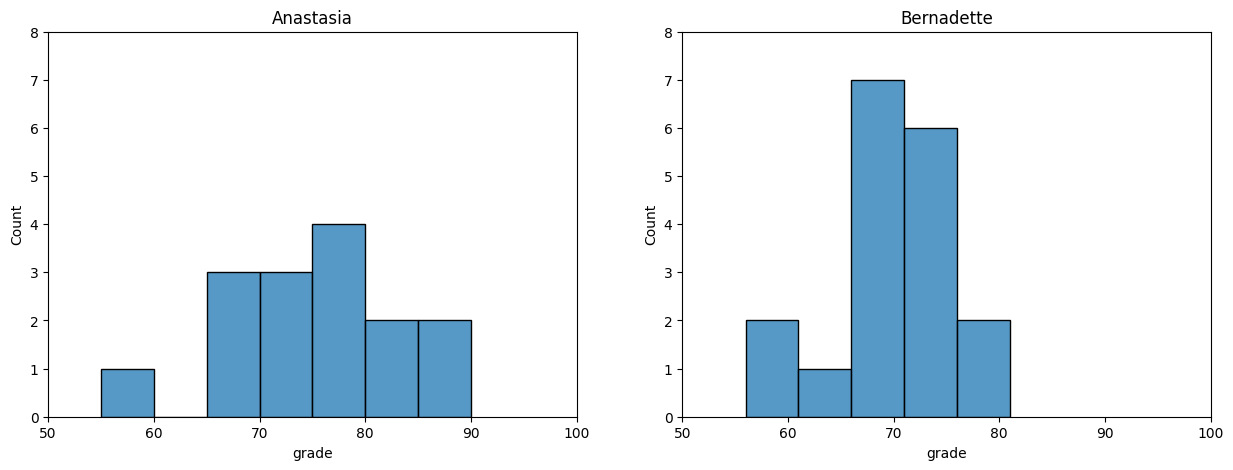

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize = (15, 5))

Anastasia = pd.DataFrame(df.loc[df['tutor'] == 'Anastasia']['grade'])
Bernadette = pd.DataFrame(df.loc[df['tutor'] == 'Bernadette']['grade'])
# print(Anastasia)
# print(Bernadette)

sns.histplot(Anastasia['grade'], ax = axes[0], binwidth = 5)
sns.histplot(Bernadette['grade'], ax = axes[1], binwidth = 5)

# x축 설정
axes[0].set_xlim(50,100)
axes[1].set_xlim(50,100)

# y축 설정
axes[0].set_ylim(0,8)
axes[1].set_ylim(0,8)

# 그래프 제목 설정
axes[0].set_title('Anastasia')
axes[1].set_title('Bernadette')

plt.show()

### pointplot()
- 두 그룹의 학생에 대한 평균과 해당 신뢰구간을 보여줌

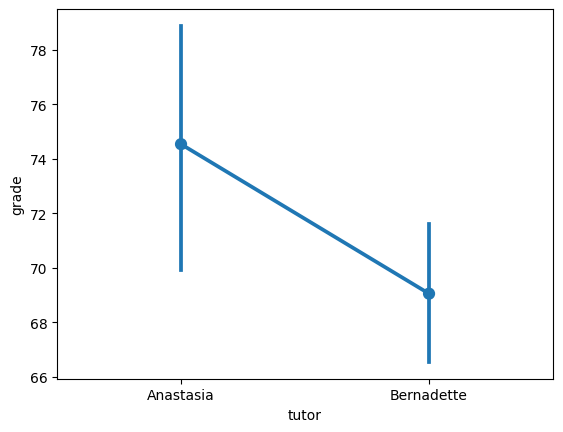

In [ ]:
sns.pointplot(x = 'tutor', y = 'grade', data = df)
plt.show()

In [ ]:
!pip install --upgrade pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=ecf9ebe23654258a8094638dbe39895a4ee217092ff2a0651e4aef0714b4d110
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


## 통계검정 실시 : 독립표본 T-검정
- 1단계 : 정규성 검정
- 2단계 : 등분산성 검정
- 3단계 : t-test => pingouin 라이브러리로 간단히

In [ ]:
import pingouin as pg
# 정규성 검정 >> 만족
pg.normality(df, dv='grade', group='tutor')

,W,pval,normal
tutor,,,
Anastasia,0.981857,0.980597,True
Bernadette,0.969075,0.780127,True


In [ ]:
# 등분산성 검정 >> 만족
pg.homoscedasticity(df, dv='grade', group='tutor')

,W,pval,equal_var
levene,2.128701,0.154622,True


In [ ]:
# t-test >> pvalue가 0.04 >> 평균의 차이가 존재함
from pingouin import ttest
ttest(Anastasia['grade'], Bernadette['grade'], correction=False)    #correction=False:독립표본t검정하겠다

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.115432,31,two-sided,0.042529,"[0.2, 10.76]",0.739561,1.755,0.53577


## 과제
- 주어진 데이터(toothgrowth.csv)에는 기니피그 60마리의 치아 길이, 투여한 비타민 C 종류, 투여량이 저장되어 있다

- 데이터의 변수
    + len : 치아의 길이
    + supp : 투여한 약제(VC: 아스코르브산, OJ: 오렌지주스)
    + does : 투여량
- 오렌지주스를 투여받은 기니피그의 치아 길이 평균이 아스코르브산을 투여받은 기니피그의 치아 길이 평균과 일치하는지 t-검정(Two Sample t-test)를 통해 답하고자 한다

In [ ]:
import pandas as pd
df = pd.read_csv('toothgrowth.csv')

In [ ]:
df.sample(10)

,len,supp,dose
59,23.0,OJ,2.0
7,11.2,VC,0.5
16,13.6,VC,1.0
11,16.5,VC,1.0
50,25.5,OJ,2.0
19,15.5,VC,1.0
56,26.4,OJ,2.0
23,25.5,VC,2.0
38,16.5,OJ,0.5
47,21.2,OJ,1.0


### 문제1. 각 그룹에 대한 표본 평균을 구한다

In [ ]:
grouped = df.groupby('supp')['len'].agg(['mean', 'count']).reset_index()
grouped

,supp,mean,count
0,OJ,20.663333,30
1,VC,16.963333,30


### 문제2. 귀무가설, 대립가설 설정한다
- 귀무가설 = 두 그룹의 평균은 동일하다
- 대립가설 = 두 그룹의 평균은 동일하지 않다

### 문제3. 정규성 검정, 등분산성 검정 코드를 작성하고 결과를 해석

In [ ]:
#정규성 : p-value = 0.17 -> 정규성 만족
!pip install scipy
import numpy as np
from scipy import stats

statistic, p_value = stats.normaltest(df[df['supp']=='OJ']['len'])
print(f'Statistics:{statistic}, p-value:{p_value}')

Statistics:3.4549967125506016, p-value:0.17772846760698235


In [ ]:
#정규성 : p-value = 0.48 -> 정규성 만족
statistic, p_value = stats.normaltest(df[df['supp']=='VC']['len'])
print(f'Statistics:{statistic}, p-value:{p_value}')

Statistics:1.4391642417300032, p-value:0.48695570207663397


In [ ]:
#등분산성 : p-value = 0.27 -> 등분산성 만족
df_group = df.groupby('supp')['len']
statistic, p_value = stats.levene(*[group.values for name, group in df_group])
print(f"Statistic: {statistic}, p-value: {p_value}")

Statistic: 1.2135720656945064, p-value: 0.2751764616144053


### 문제4. t-test 진행, t통계량과 p-value 구하기

In [ ]:
#등분산성 만족-> 등분산 티검정
group1 = df[df['supp'] == 'OJ']['len']
group2 = df[df['supp'] == 'VC']['len']

statistic, p_value = stats.ttest_ind(group1, group2, equal_var=True)
print(f"Statistic: {statistic}, p-value: {p_value}")

Statistic: 1.91526826869527, p-value: 0.06039337122412849


### 문제5. 가설검정의 결과를 귀무가설을 기준으로 채택/기각 여부를 판단

In [ ]:
#p-value = 0.06 : 귀무가설 채택 => 두 그룹의 평균이 유의미하게 차이가 없다